<div class="alert alert-block alert-warning">

<h1>Intel Image Classification</h1>
    
<a href="https://www.kaggle.com/datasets/puneet6060/intel-image-classification">Kaggle Link</a>

    
<h2>About Dataset</h2>
<p>Context</p>
<blockquote>This is image data of Natural Scenes around the world.</blockquote>

<p>Content</p>
<blockquote>
This Data contains around 25k images of size 150x150 distributed under 6 categories.
</blockquote>
</div>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.utils import img_to_array, load_img

## Importing Train and Test Sets

In [4]:
train_data_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
training_set = train_data_gen.flow_from_directory('./seg_train/', target_size=(128,128),batch_size=32,class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [5]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_set = train_data_gen.flow_from_directory('./seg_test/', target_size=(128,128),batch_size=32,class_mode='categorical')

Found 3000 images belonging to 6 classes.


## Creating CNN Model

In [6]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=3, activation='relu',input_shape =(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=3,activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=3,activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))

model.add(Flatten())

model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.fit(x = training_set, validation_data=test_set,epochs=10)
history = model.history.history

Epoch 1/10
439/439 [==============================] - 115s 262ms/step - loss: 0.9679 - accuracy: 0.6239 - val_loss: 0.8510 - val_accuracy: 0.6733
Epoch 2/10
439/439 [==============================] - 119s 271ms/step - loss: 0.7026 - accuracy: 0.7421 - val_loss: 0.6585 - val_accuracy: 0.7630
Epoch 3/10
439/439 [==============================] - 121s 275ms/step - loss: 0.6018 - accuracy: 0.7857 - val_loss: 0.6015 - val_accuracy: 0.7840
Epoch 4/10
439/439 [==============================] - 168s 383ms/step - loss: 0.5412 - accuracy: 0.8059 - val_loss: 0.5407 - val_accuracy: 0.8087
Epoch 5/10
439/439 [==============================] - 220s 501ms/step - loss: 0.4929 - accuracy: 0.8242 - val_loss: 0.4730 - val_accuracy: 0.8367
Epoch 6/10
439/439 [==============================] - 133s 302ms/step - loss: 0.4848 - accuracy: 0.8249 - val_loss: 0.5737 - val_accuracy: 0.7997
Epoch 7/10
439/439 [==============================] - 126s 286ms/step - loss: 0.4492 - accuracy: 0.8422 - val_loss: 0.4508 -

## Plot Losses and Accuracies

In [8]:
loss = pd.DataFrame(history['loss'],columns=['loss'])
val_loss = pd.DataFrame(history['val_loss'],columns=['val_loss'])
accuracy = pd.DataFrame(history['accuracy'],columns=['accuracy'])
val_accuracy = pd.DataFrame(history['val_accuracy'],columns=['val_accuracy'])
scores = pd.concat([loss,val_loss,accuracy,val_accuracy],axis = 1)

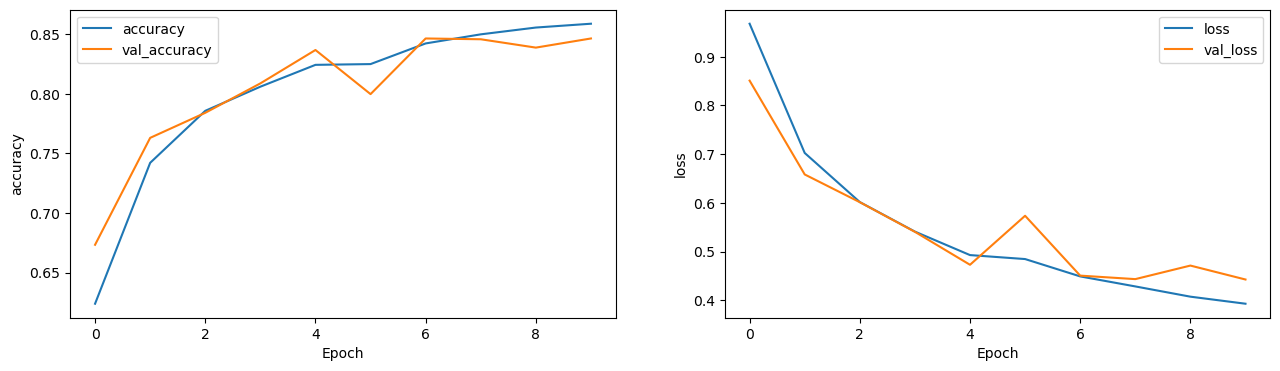

In [9]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.lineplot(data = scores['accuracy'],label = 'accuracy')
sns.lineplot(data = scores['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
sns.lineplot(data = scores['loss'],label = 'loss')
sns.lineplot(data = scores['val_loss'],label = 'val_loss')
plt.xlabel('Epoch')

plt.subplots_adjust(left = 0.1,right = 0.9)
plt.show()

## Predict Images

In [10]:
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [11]:
def prediction(image):
    # class names
    class_names = list(training_set.class_indices.keys()) # ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    
    # image preprocessing
    img = img_to_array(image)
    img /=255
    
    # predict class
    img = np.expand_dims(img,axis = 0)
    result = model.predict(img)
    return class_names[np.argmax(result)]

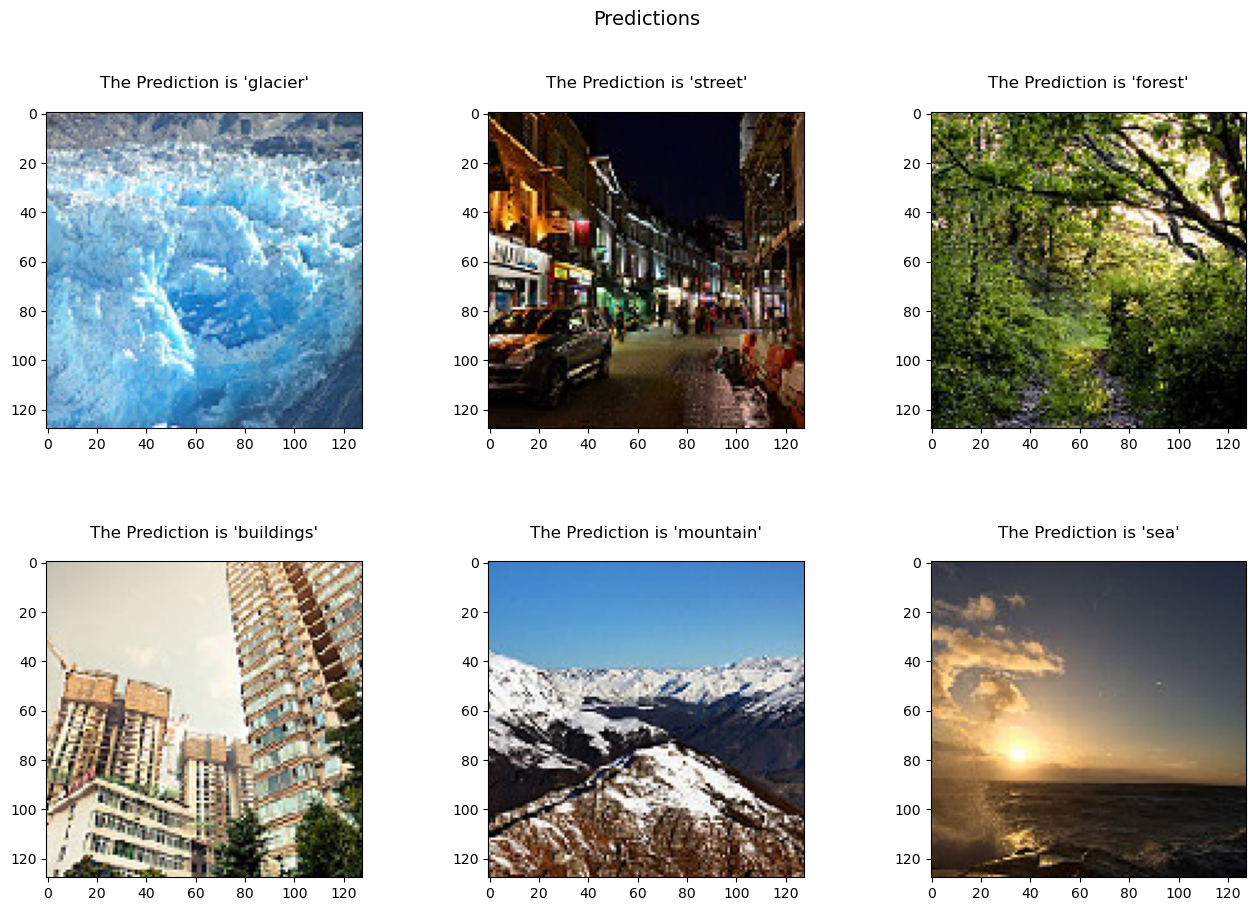

In [12]:
plt.figure(figsize = (15,10))

i = 1
root = './seg_valid/'
files = [file for file in os.listdir(root)]
for file in files:
    image = load_img(root + file,target_size=(128,128))
    
    pred = prediction(image)
    title = f"The Prediction is '{pred}'"
    
    plt.subplot(2,3,i)
    i+=1
    plt.title(title,y = 1.05,size = 12)
    plt.imshow(image)
    
plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.4)
plt.suptitle('Predictions',size = 14)
plt.show()

## Save CNN Model

In [13]:
try:
    choice = input("Press any key to save model or press 'e' to cancel").lower()
    if choice != 'e':
        model.save('my_model.h5')
        print('Model Saved!')
    else:
        print('Model Not Saved!')
except Exception as ex:
    print(ex)

Press any key to save model or press 'e' to cancel
Model Saved!
